# Feature Engineering

#### Steps to feature engineer
1. Feature Transformation
* Missing values
* Categorical Data
* Outlier detection
* Feature scaling

2. Feature construction

3. Feature selection

4. Feature extraction

## 1. Feature scaling

a. Standardization <br>
b. Normalization

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('data/Social_Network_Ads.csv')

In [6]:
df = df.iloc[:,2:]

In [7]:
df.sample(10)

,Age,EstimatedSalary,Purchased
133,21,68000,0
206,55,130000,1
273,39,106000,1
358,40,71000,1
157,29,75000,0
322,41,52000,0
213,35,58000,0
155,31,15000,0
237,37,80000,0
130,31,58000,0


In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.2,random_state=2)
X_train.shape, 

((320, 2),)

### a. Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [17]:
X_train_scaled

,Age,EstimatedSalary
0,0.889288,-0.659246
1,-0.172548,0.873927
2,-1.041324,-0.364405
3,0.985819,0.608570
4,-0.944793,0.579086
...,...,...
315,0.792758,1.404640
316,0.985819,-0.836150
317,-1.717038,-1.366863
318,-0.848263,0.313729


Text(0.5, 0, 'EstimatedSalary')

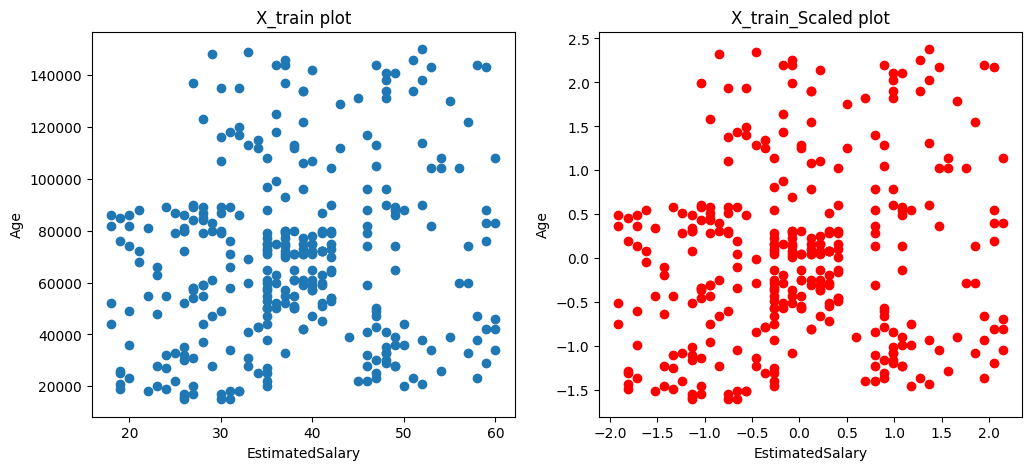

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('X_train plot')
ax1.set_ylabel('Age')
ax1.set_xlabel('EstimatedSalary')

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('X_train_Scaled plot')
ax2.set_ylabel('Age')
ax2.set_xlabel('EstimatedSalary')

<AxesSubplot:title={'center':'After scale'}, xlabel='Age', ylabel='Density'>

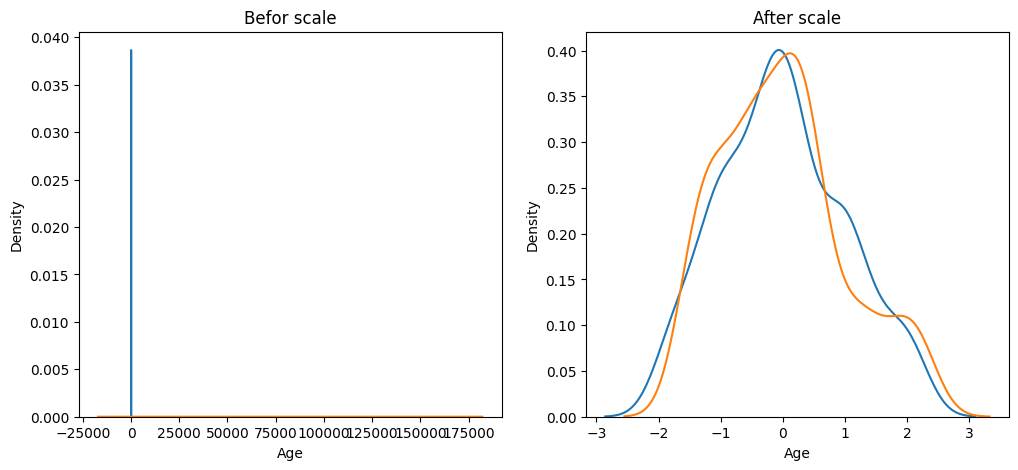

In [33]:
# similarly create 2 kedplot from sns library

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Befor scale')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)


ax2.set_title('After scale')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)


### b. Normalization

In [40]:
df = pd.read_csv('data/Social_Network_Ads.csv')
df = df.iloc[:,2:]

X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.2,random_state=2)
X_train.shape, 

((320, 2),)

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# X_train.head
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Text(0.5, 0, 'EstimatedSalary')

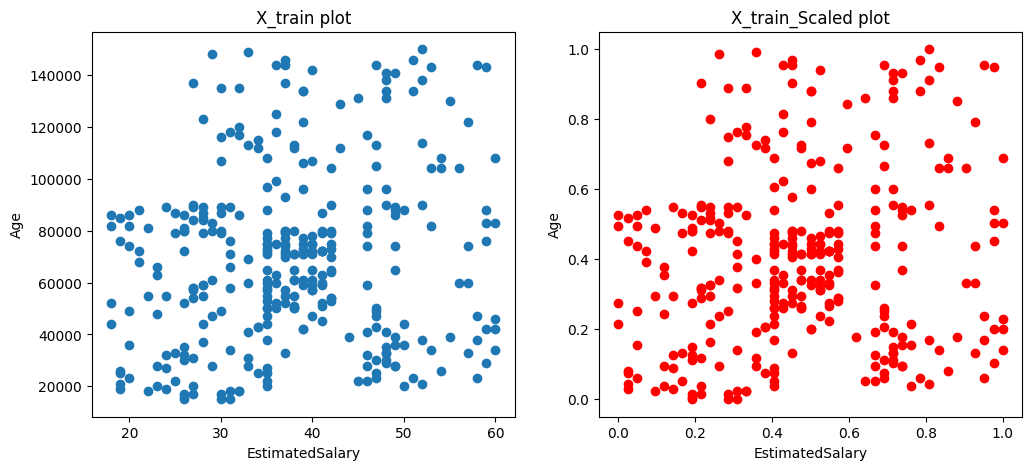

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('X_train plot')
ax1.set_ylabel('Age')
ax1.set_xlabel('EstimatedSalary')

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('X_train_Scaled plot')
ax2.set_ylabel('Age')
ax2.set_xlabel('EstimatedSalary')

## 2. Categorical Encoding -